### Nearest Neighbors Model for Kepler Space Telescope Data
The purpose of this project is to reinforce my data science and machine learning knowledge, and to help others in their journeys. I'm not an expert on these topics, and I'm conscious that there are a lot of tools, concepts and techniques that I need to master. That's why I develop this project, to share with the community the tools, concepts and techniques, that I have learned across my data science journey. I'm open to comments, critics and feedback that would help me to develop learn best practices and corrections in case I was wrong.

In [18]:
#import warnings
#warnings.simplefilter('ignore')
import pandas as pd
import numpy as np

In [19]:
kepler_df = pd.read_csv('../../data/exoplanet_data.csv')
kepler_df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [20]:
kepler_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

In [21]:
print(f"The dataframe has a length of {len(kepler_df.columns)} columns.")
print(f"There are 3 outcomes/predictions/targets: {set(kepler_df['koi_disposition'])}")

The dataframe has a length of 41 columns.
There are 3 outcomes/predictions/targets: {'FALSE POSITIVE', 'CANDIDATE', 'CONFIRMED'}


In [25]:
features = kepler_df.drop('koi_disposition', axis = 1)
target = kepler_df['koi_disposition']

print(features.shape)
print(target.shape)

(6991, 40)
(6991,)


In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [58]:
from sklearn.preprocessing import MinMaxScaler


X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)


In [59]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [33]:
predict = knn.predict(X_test)

In [35]:
knn.score(X_test, y_test)

0.4861773117254528

In [36]:
predictor_df = pd.DataFrame({'Prediction':predict, 'Actual':y_test}).reset_index(drop=True)

In [39]:
predictor_df.head()

,Prediction,Actual
0,FALSE POSITIVE,FALSE POSITIVE
1,FALSE POSITIVE,CANDIDATE
2,FALSE POSITIVE,FALSE POSITIVE
3,FALSE POSITIVE,FALSE POSITIVE
4,FALSE POSITIVE,FALSE POSITIVE


In [61]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

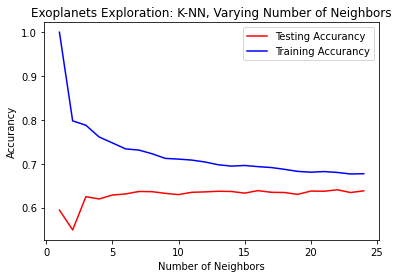

In [63]:
import matplotlib.pyplot as plt

neighbors = np.arange(1,25)
train_accurancy = np.empty(len(neighbors))
testing_accurancy = np.empty(len(neighbors))

for index, v in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = v)
    knn.fit(X_train, y_train)
    train_accurancy[index] = knn.score(X_train, y_train)
    testing_accurancy[index] = knn.score(X_test, y_test)

plt.title('Exoplanets Exploration: K-NN, Varying Number of Neighbors')
plt.plot(neighbors, testing_accurancy, label = 'Testing Accurancy', c = 'red')
plt.plot(neighbors, train_accurancy, label = 'Training Accurancy', c ='blue')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accurancy')
plt.show()